In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import IPython.display as ipd
from IPython.display import Audio

In [10]:
BASE_DIR = "/Users/adityagandhi/Documents/Air_Embolism"; 
AIR_EMBOLISM_FILE = 'DBS2.mp3'

In [11]:
data, sr = librosa.load(os.path.join(BASE_DIR, AIR_EMBOLISM_FILE))

In [12]:
data_ft = np.fft.fft(data) 

In [13]:
def plot_magnitude_data(signal, title, sr, f_ratio = 1): 
    # converts time-domain into frequency-domain by calculating the Discrete Fourier Transform(DFT)
    ft = np.fft.fft(signal) 
    magnitude_data = np.abs(ft) 
    
    # create plot figure 
    plt.figure(figsize =(18,5)) 

    # 0 represents lowest frequency, sr represents highest frequency, len(magnitude_data) = how many values will be generated to make sure there is one frequency value for each magnitude point 
    frequency = np.linspace(0, sr, len(magnitude_data))
    num_frequency_bins = int (len(frequency) * f_ratio) 
    
    plt.plot(frequency[:num_frequency_bins], magnitude_data[:num_frequency_bins])
    
    plt.xlabel("Frequency (Hz)")
    plt.title(title)
    plt.show() 

    #plot magnitude spectrum 

In [14]:
def plot_amplitude_data (signal, title, sr):
    plt.figure(figsize=(18, 5))
    librosa.display.waveshow(signal, sr=sr, color = 'purple')

    plt.title('Audio Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    plt.show() 


In [15]:
def plot_spectrogram(signal, title, sr):
    # Compute the Short-Time Fourier Transform (STFT)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)

    # Display the spectrogram
    plt.figure(figsize=(18, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.savefig("spectrogram_plot.png") 

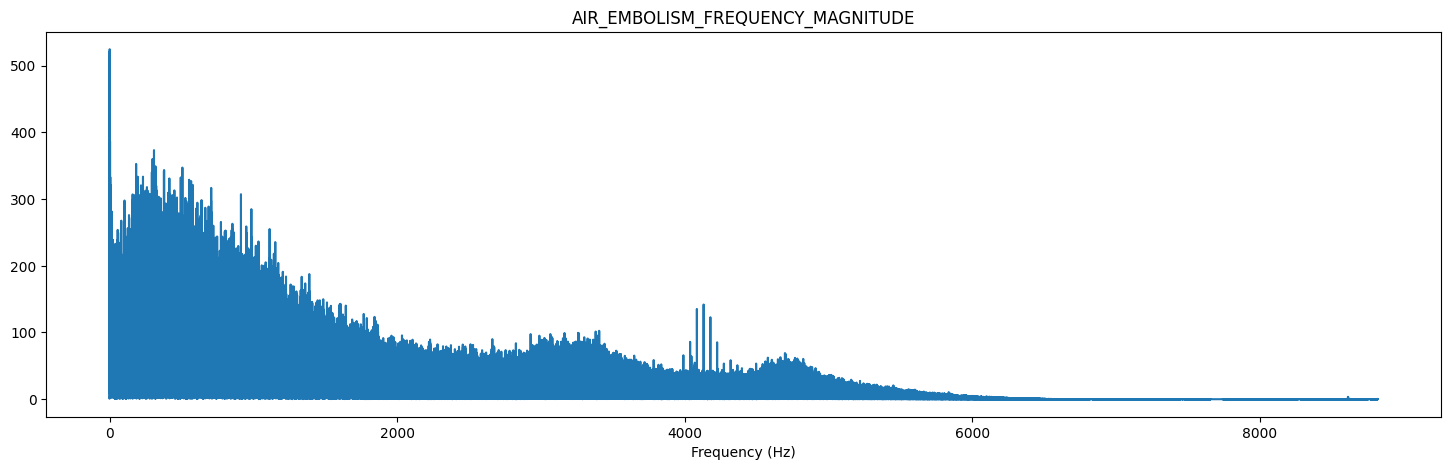

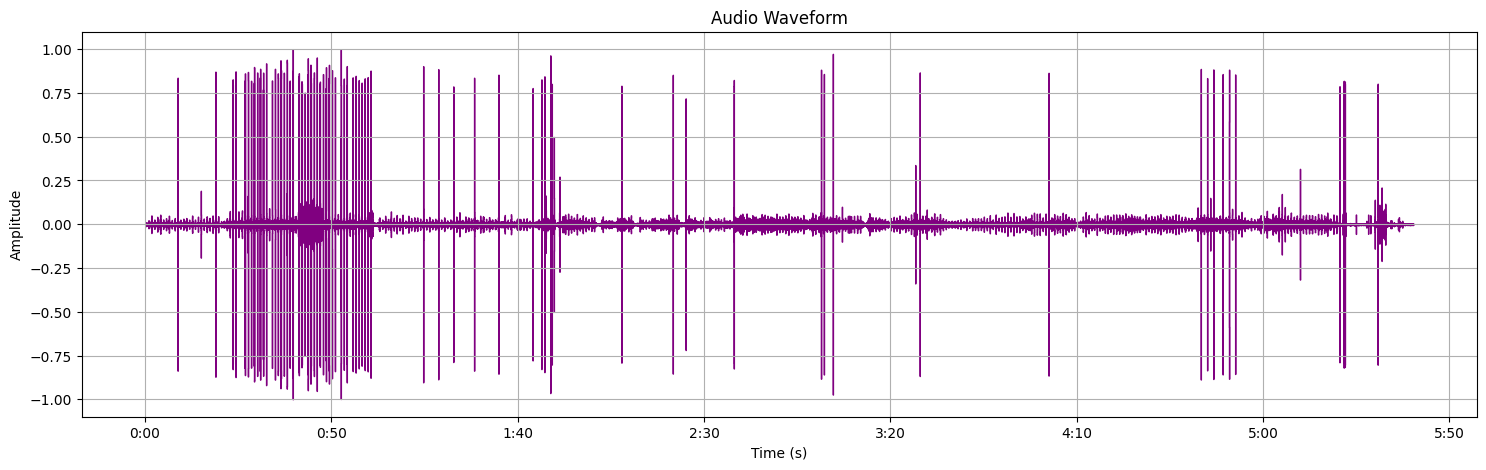

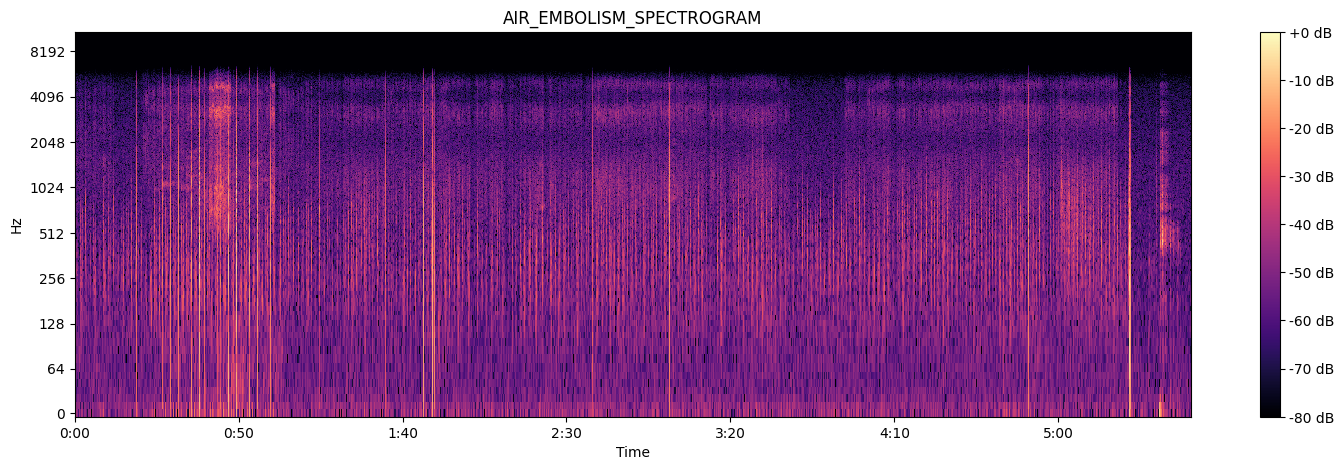

In [16]:
plot_magnitude_data(data, "AIR_EMBOLISM_FREQUENCY_MAGNITUDE", sr, 0.4)
plot_amplitude_data(data, "AIR_EMBOLISM_AMPLITUDE_TIME", sr)
plot_spectrogram(data, "AIR_EMBOLISM_SPECTROGRAM", sr) 